# Sales Forecast 

In [2905]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2906]:
# Load the dataset
store_sales = pd.read_csv('/Users/osbert/Desktop/SQL/forecast.csv')

store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [2907]:
#Check for Nulls
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [2908]:
#Drop Stores and Item Columns
store_sales = store_sales.drop(['store','item'], axis=1 )
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [2909]:
#Converting Date from Object Datatype to DateTime Data Type
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [2910]:
#Predict Sales for the Next Month, Instead of Next Day
#Converting Date to Month Period and the Sum of the Number of Items in Each Month
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [2911]:
#Convert the Resulting Date Column to TimeStamp Data Type
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


Text(0.5, 1.0, 'Monthly Customer Sales')

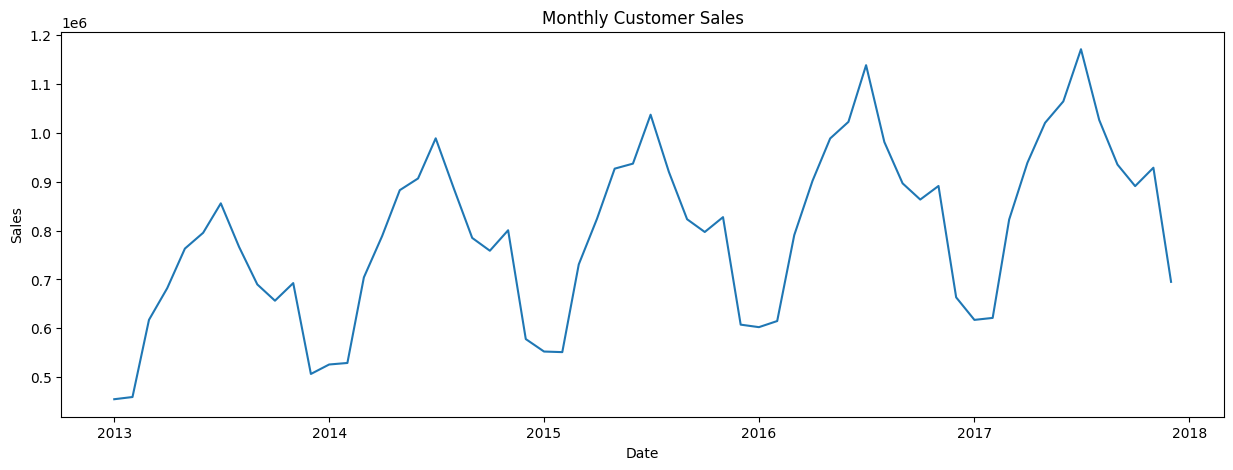

In [2912]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")

In [2913]:
#Call the Difference on the Sales Columns to make the Sales Data Stationary
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()

monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


In [2914]:
#Dropping Off Sales and Date, to deal with Stationary Sales Data
supervised_data = monthly_sales.drop(['date' ,'sales'], axis=1 )

#Preparing the Supervised Data
for i in range (1,13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)



,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [2915]:
#Split Data into Train and Test 

# Splitting data into train and test sets
#Previous 12 months
train_data = supervised_data[:-12]
#Upcoming 12 months
test_data = supervised_data[-12:]

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape) 

Train data shape:  (35, 13)
Test data shape:  (12, 13)


In [2916]:
scaler = MinMaxScaler (feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [2917]:
# Splitting data into input and output
x_train, y_train = train_data[:, 1:], train_data[:, 0:1]
x_test, y_test = test_data[:, 1:], test_data[:, 0:1]

y_train = y_train.ravel()
y_test = y_test.ravel()

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (35, 12)
y_train shape:  (35,)
x_test shape:  (12, 12)
y_test shape:  (12,)


In [2918]:
# Make Prediction Datafram to Merge the Predicted Sales Prices of all Trained Algs
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

# Actual sales for the last 13 months
actual_sales = monthly_sales['sales'][-13:].to_list()
print (actual_sales)


[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [2919]:
# To Create the Linear Regression Model, and Predicted Output
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)


In [2920]:
# Inverse transform to original scale
lr_pre = lr_pre.reshape(-1,1)
# Create Test Set Matrix  
# Contains the input features of test data, and also the predicted output 
lr_pre_test_set = np.concatenate([lr_pre,x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)


In [2921]:
# Calculating predicted sales
result_list = []
for index in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + actual_sales[index])

lr_predict_series = pd.Series(result_list, name='Linear Prediction')
# Merging with prediction DataFrame
predict_df = predict_df.merge(lr_predict_series,left_index=True, right_index=True)

In [2922]:
# Model Evaluation
# Ensure both arrays have the same length
lr_mse = np.sqrt(mean_squared_error(predict_df["Linear Prediction"], monthly_sales["sales"][-12:]))
lr_mae = mean_absolute_error(predict_df["Linear Prediction"], monthly_sales["sales"][-12:])
lr_r2 = r2_score(predict_df["Linear Prediction"], monthly_sales["sales"][-12:])

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")


Linear Regression MSE: 16221.272385416905
Linear Regression MAE: 12433.184266490804
Linear Regression R2 Score: 0.9906152516380968


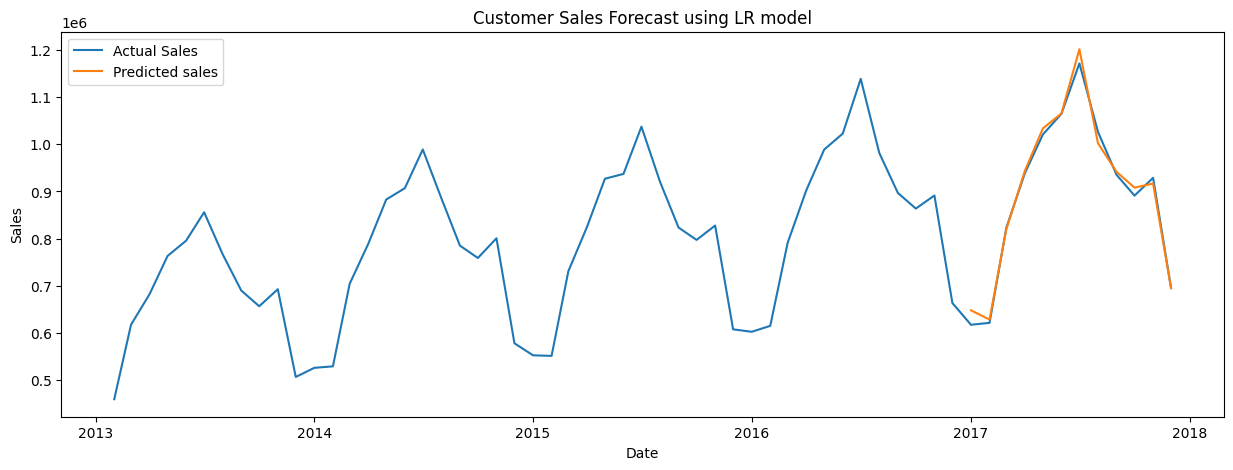

In [2923]:
plt.figure(figsize=(15,5))
#actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])

#Predicted sales
plt.plot(predict_df['date'], predict_df["Linear Prediction"])
plt.title("Customer Sales Forecast using LR model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales','Predicted sales'])
